In [3]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

read the csv

In [4]:
df = pd.read_csv("../data/TAIPEI_diabetes.csv")

check the structure

In [5]:
print("information:")
df.info()

information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


verify data types

In [6]:
print("\nFirst rows of the dataset:")
print(df.head())


First rows of the dataset:
   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  


check if there are missing values

In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


no missing values in the dataset we can proceed to the next step
Patient ID is not useful for the analysis and the prediction of the target variable, so we can drop it

In [8]:
df.drop('PatientID', axis=1, inplace=True)
# check the head
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


view data statistics in rows 

In [9]:
df_summary = df.describe()
print("\nStatistical summary of the dataset:")
print(df_summary)


Statistical summary of the dataset:
        Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
count  15000.000000   15000.000000            15000.000000      15000.000000   
mean       3.224533     107.856867               71.220667         28.814000   
std        3.391020      31.981975               16.758716         14.555716   
min        0.000000      44.000000               24.000000          7.000000   
25%        0.000000      84.000000               58.000000         15.000000   
50%        2.000000     104.000000               72.000000         31.000000   
75%        6.000000     129.000000               85.000000         41.000000   
max       14.000000     192.000000              117.000000         93.000000   

       SerumInsulin           BMI  DiabetesPedigree           Age  \
count  15000.000000  15000.000000      15000.000000  15000.000000   
mean     137.852133     31.509646          0.398968     30.137733   
std      133.068252      9.759000  

Detect potential outliers

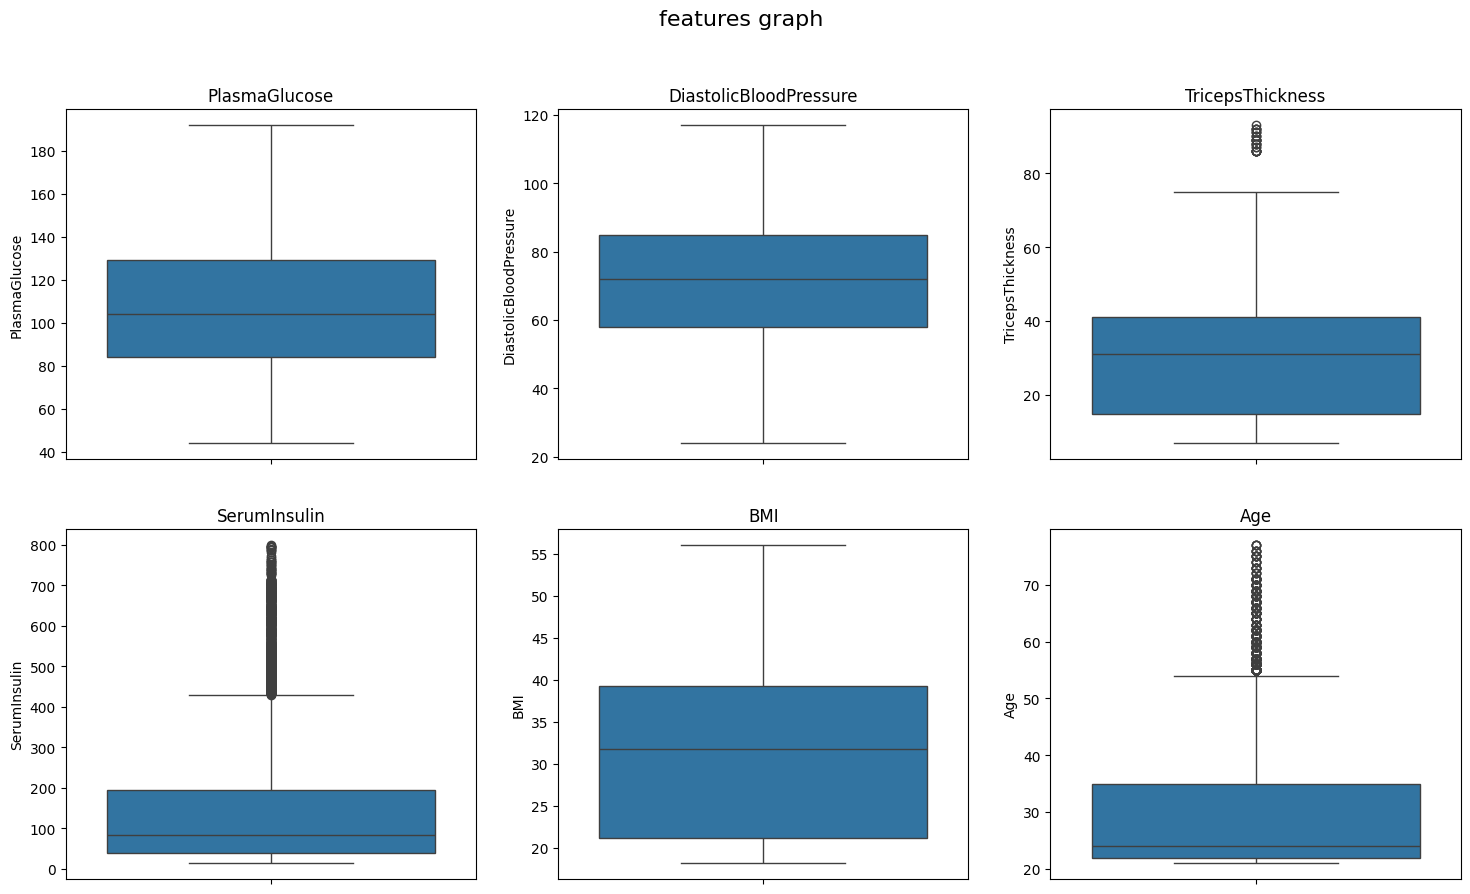

In [10]:
num_features = ["PlasmaGlucose", "DiastolicBloodPressure","TricepsThickness", "SerumInsulin","BMI","Age"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("features graph", fontsize=16)

for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)
    sns.boxplot(y=df[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.show()


confirm the outliers
relations : (TricepsThickness and age) & (PlasmaGlucose ansd SerumInsulin)

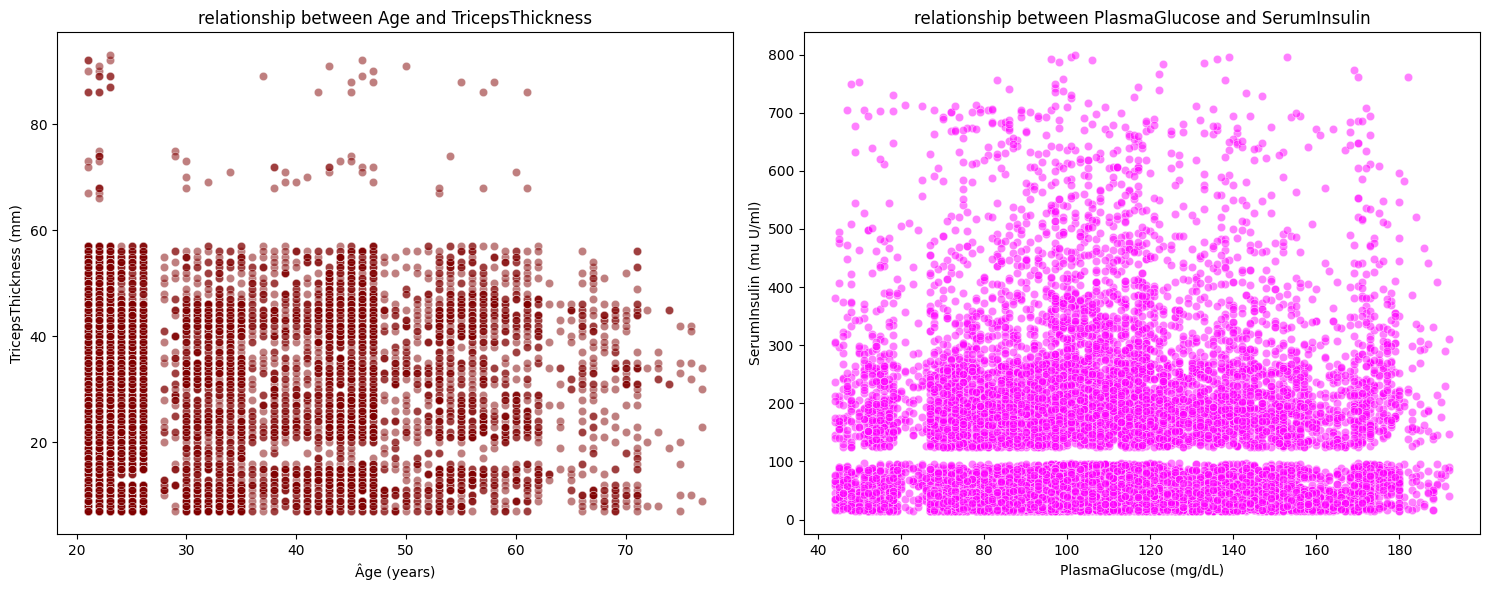

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# TricepsThickness vs Age
sns.scatterplot(x=df["Age"], y=df["TricepsThickness"], alpha=0.5, ax=axes[0], color='maroon')
axes[0].set_title("relationship between Age and TricepsThickness")
axes[0].set_xlabel("Âge (years)")
axes[0].set_ylabel("TricepsThickness (mm)")

# SerumInsulin vs PlasmaGlucose
sns.scatterplot(x=df["PlasmaGlucose"], y=df["SerumInsulin"], alpha=0.5, ax=axes[1], color='magenta')
axes[1].set_title("relationship between PlasmaGlucose and SerumInsulin")
axes[1].set_xlabel("PlasmaGlucose (mg/dL)")
axes[1].set_ylabel("SerumInsulin (mu U/ml)")

plt.tight_layout()
plt.show()

detection of extreme values for TricepsThickness & SerumInsulin

compilation of the result in table

In [24]:
# detection of outliers
triceps_outliers = df[df["TricepsThickness"] > 80]["TricepsThickness"]
insulin_outliers = df[df["SerumInsulin"] > 429]["SerumInsulin"]

# enrich and compil the results for table
outlier_summary = pd.DataFrame({
    "col name": ["TricepsThickness", "SerumInsulin"],
    "nb outliers": [len(triceps_outliers), len(insulin_outliers)],
    "extreme values": [triceps_outliers.unique()[:10], insulin_outliers.unique()[:10]]
})

display(outlier_summary)

,col name,nb outliers,extreme values
0,TricepsThickness,31,"[91, 86, 88, 90, 89, 92, 87, 93]"
1,SerumInsulin,666,"[541, 469, 471, 479, 593, 665, 597, 517, 448, ..."


based on the visual analysis

TricepsThickness >80mm is an outlier because normal skinfold thickness rarely exceeds 40-50mm (even in obese individuals), values above 80mm are likely due to measurement errors or extreme rare cases 

SOURCES : [researchgate Mean triceps](https://www.researchgate.net/figure/Mean-triceps-skin-fold-thickness-SD-according-to-age-and-gender_tbl1_352011899)

SerumInsulin >429 (µU/mL) is an outlier because normal fasting insulin levels are between 5-29 (µU/mL) and value above 400 (µU/mL) are usually not physiologically normal, these extreme values might be data entry errors or rare.

SOURCES : [pubmed Mean reference values for fasting serum insulin levels](https://pubmed.ncbi.nlm.nih.gov/24530467/) , [zoe Mean What are normal insulin levels for females](https://zoe.com/learn/what-are-normal-insulin-levels-for-women)

check age for anomalies

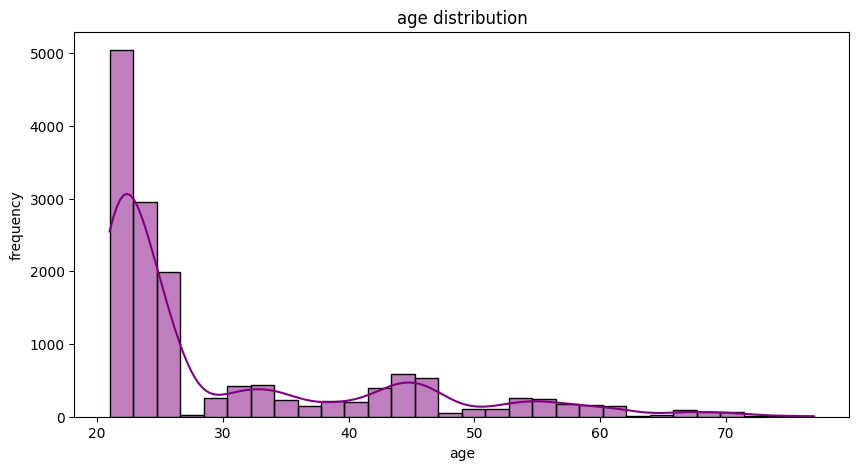

(np.int64(77), np.int64(21))

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df["Age"], bins=30, kde=True, color='purple')
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

# get the extreme values
age_max = df["Age"].max()
age_min = df["Age"].min()

age_max, age_min

age doesnt have anomaly the distribution and min/max are correct